c:\Users\dell xps 15\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.0398 - val_loss: 0.0230
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0227 - val_loss: 0.0210
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0210 - val_loss: 0.0205
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0208 - val_loss: 0.0201
Epoch 5/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0206 - val_loss: 0.0199
Epoch 6/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0198 - val_loss: 0.0191
Epoch 7/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202 - val_loss: 0.0191
Epoch 8/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0189 - val_loss: 0.0196
Epoch 9/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0189 - val_loss: 0.0187
Epoch 10/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0196 - val_loss: 0.0188
Epoch 11/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190 - val_loss: 0.0189
Epoch 12/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/st

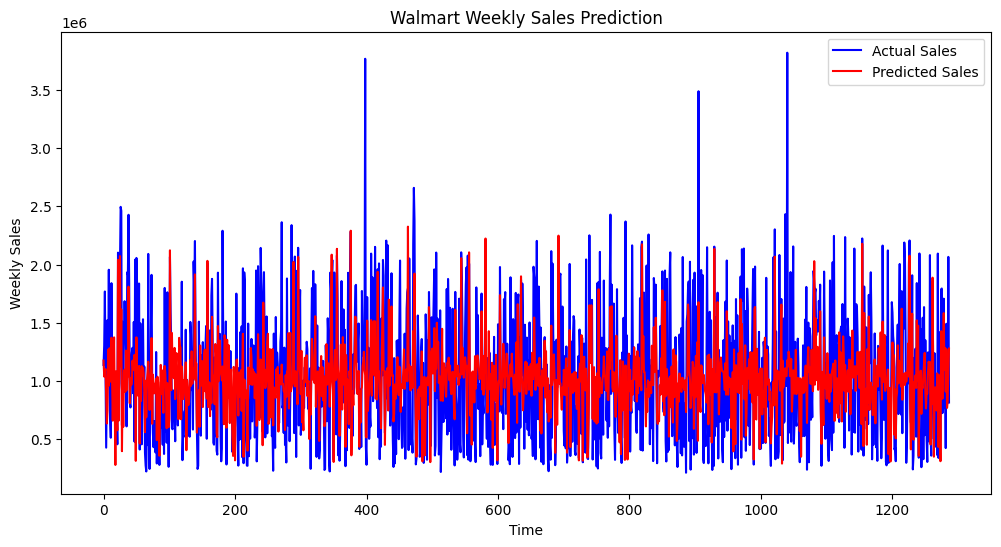

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Load the dataset
walmart = pd.read_csv('C:/Users/dell xps 15/Desktop/dataset/walmart.csv')

# Preprocess the Date and extract features
walmart["Date"] = pd.to_datetime(walmart["Date"], format="%d-%m-%Y")
walmart['Year'] = walmart['Date'].dt.year
walmart['Month'] = walmart['Date'].dt.month
walmart['Day'] = walmart['Date'].dt.day
walmart['Weekday'] = walmart['Date'].dt.weekday

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Applying LabelEncoder on categorical columns
walmart['Store'] = encoder.fit_transform(walmart['Store'])
walmart['Holiday_Flag'] = encoder.fit_transform(walmart['Holiday_Flag'])

# Define features and target
features = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Weekday', 'Holiday_Flag']
target_column = 'Weekly_Sales'
X = walmart[features]
y = walmart[target_column]

# Normalize the features and target
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Reshape X to fit LSTM input (3D input: [samples, time steps, features])
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)

# Inverse scaling to get original values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, y_pred_original)
print("Mean Squared Error:", mse)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, color='blue', label='Actual Sales')
plt.plot(y_pred_original, color='red', label='Predicted Sales')
plt.title('Walmart Weekly Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


Epoch 1/20


c:\Users\dell xps 15\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


161/161 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0398 - val_loss: 0.0229
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0219 - val_loss: 0.0209
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0214 - val_loss: 0.0204
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0215 - val_loss: 0.0203
Epoch 5/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0209 - val_loss: 0.0198
Epoch 6/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0205 - val_loss: 0.0195
Epoch 7/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0200 - val_loss: 0.0193
Epoch 8/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193 - val_loss: 0.0193
Epoch 9/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187 - val_loss: 0.0191
Epoch 10/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194 - val_loss: 0.0190
Epoch 11/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189 - val_loss: 0.0189
Epoch 12/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 

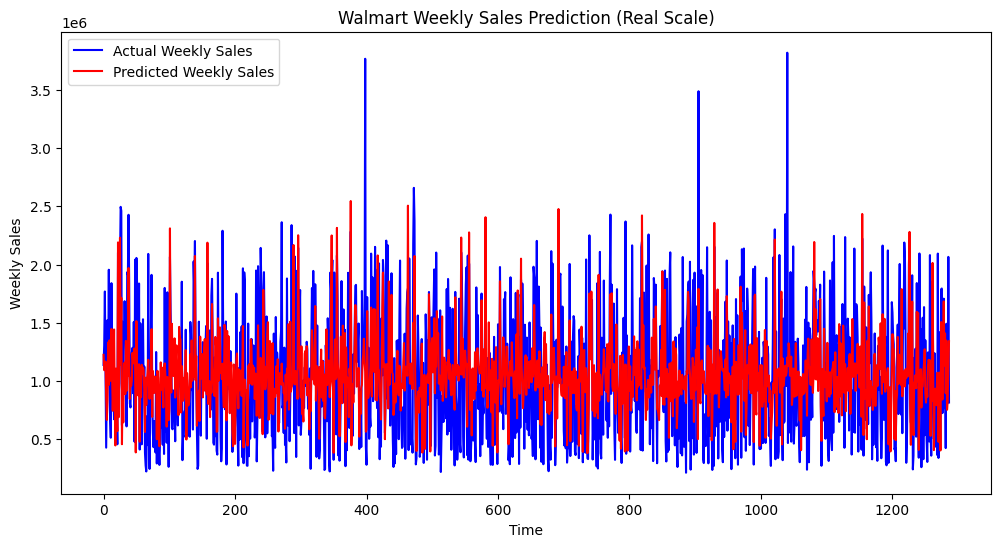

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Load the dataset
walmart = pd.read_csv('C:/Users/dell xps 15/Desktop/dataset/walmart.csv')

# Preprocess the Date and extract features
walmart["Date"] = pd.to_datetime(walmart["Date"], format="%d-%m-%Y")
walmart['Year'] = walmart['Date'].dt.year
walmart['Month'] = walmart['Date'].dt.month
walmart['Day'] = walmart['Date'].dt.day
walmart['Weekday'] = walmart['Date'].dt.weekday

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Applying LabelEncoder on categorical columns
walmart['Store'] = encoder.fit_transform(walmart['Store'])
walmart['Holiday_Flag'] = encoder.fit_transform(walmart['Holiday_Flag'])

# Define features and target
features = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Weekday', 'Holiday_Flag']
target_column = 'Weekly_Sales'
X = walmart[features]
y = walmart[target_column]

# Normalize the features and target
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape X to fit LSTM input (3D input: [samples, time steps, features])
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict the sales on the test set
y_pred_scaled = model.predict(X_test)

# Inverse scaling to get real values (original scale) for predictions and actual values
y_pred_real = scaler_y.inverse_transform(y_pred_scaled)
y_test_real = scaler_y.inverse_transform(y_test)

# Calculate Mean Squared Error on real scale
mse = mean_squared_error(y_test_real, y_pred_real)
print("Mean Squared Error on real scale:", mse)

# Plot the predicted vs actual values in their real scale
plt.figure(figsize=(12, 6))
plt.plot(y_test_real, color='blue', label='Actual Weekly Sales')
plt.plot(y_pred_real, color='red', label='Predicted Weekly Sales')
plt.title('Walmart Weekly Sales Prediction (Real Scale)')
plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


Epoch 1/20


c:\Users\dell xps 15\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0275 - val_loss: 0.0207
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0215 - val_loss: 0.0189
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0210 - val_loss: 0.0188
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0196 - val_loss: 0.0187
Epoch 5/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0198 - val_loss: 0.0185
Epoch 6/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0186 - val_loss: 0.0179
Epoch 7/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0190 - val_loss: 0.0180
Epoch 8/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0189 - val_loss: 0.0179
Epoch 9/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0177 - val_loss: 0.0181
Epoch 10/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0183 - val_loss: 0.0172
Epoch 11/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0180 - val_loss: 0.0170
Epoch 12/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/ste

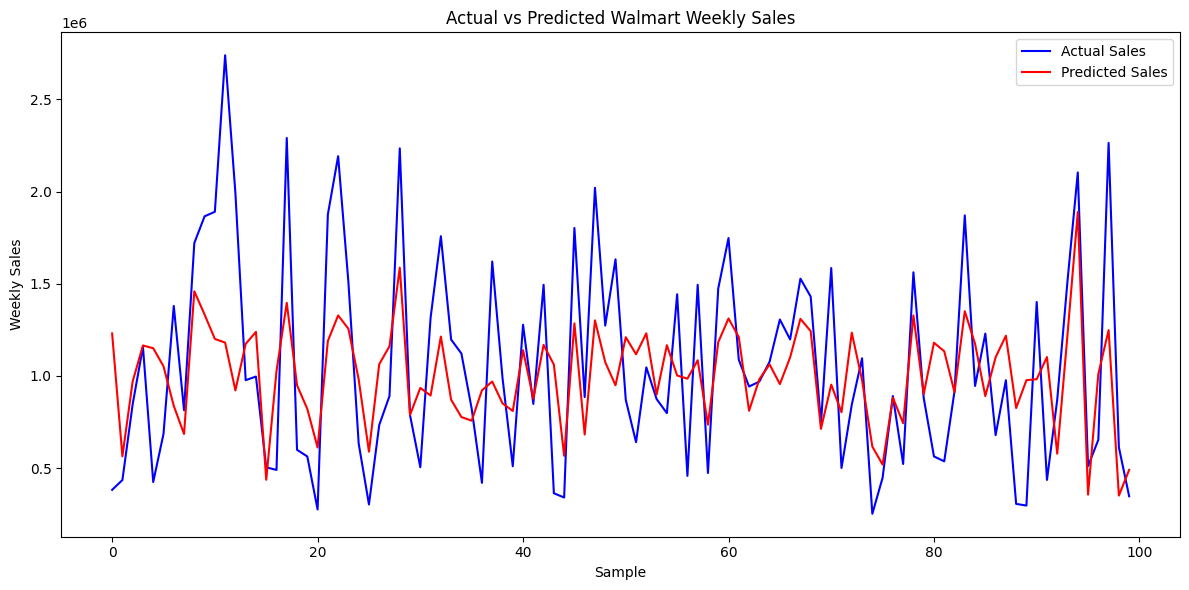

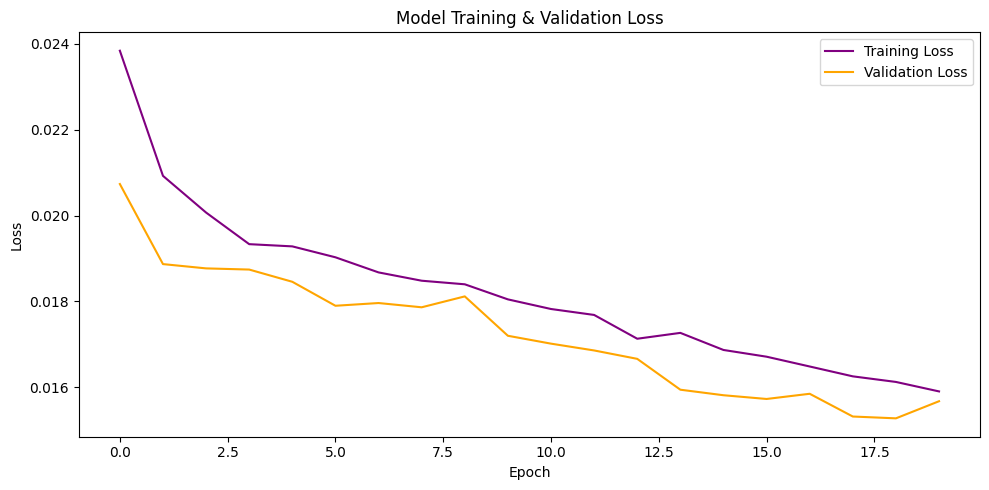

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load the dataset
walmart = pd.read_csv('C:/Users/dell xps 15/Desktop/dataset/walmart.csv')

# Parse the Date column
walmart["Date"] = pd.to_datetime(walmart["Date"], format="%d-%m-%Y")

# Extract time-based features
walmart['Year'] = walmart['Date'].dt.year
walmart['Month'] = walmart['Date'].dt.month
walmart['Day'] = walmart['Date'].dt.day
walmart['Weekday'] = walmart['Date'].dt.weekday

# Encode categorical variables
encoder = LabelEncoder()
walmart['Store'] = encoder.fit_transform(walmart['Store'])
if walmart['Holiday_Flag'].nunique() > 2:
    walmart['Holiday_Flag'] = encoder.fit_transform(walmart['Holiday_Flag'])

# Define features and target
features = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Weekday', 'Holiday_Flag']
target_column = 'Weekly_Sales'
X = walmart[features]
y = walmart[target_column]

# Normalize features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Define number of previous time steps (weeks) to look at
time_steps = 9

# Create sequences for multi-step LSTM
def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(time_steps, len(X)):
        Xs.append(X[i - time_steps:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict and inverse scale
y_pred_scaled = model.predict(X_test)
y_pred_real = scaler_y.inverse_transform(y_pred_scaled)
y_test_real = scaler_y.inverse_transform(y_test)

# Evaluation
mse = mean_squared_error(y_test_real, y_pred_real)
mae = mean_absolute_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(y_test_real[:100], label='Actual Sales', color='blue')
plt.plot(y_pred_real[:100], label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Walmart Weekly Sales')
plt.xlabel('Sample')
plt.ylabel('Weekly Sales')
plt.legend()
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='purple')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import numpy as np
import json
import requests
from io import StringIO
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
# import supabase_py  # Optionally for Supabase integration

# Function to load dataset from Supabase or CSV URL
def load_data_from_csv(csv_url):
    response = requests.get(csv_url)
    df = pd.read_csv(StringIO(response.text))
    return df

# Preprocess and prepare data for prediction
def preprocess_data(df):
    df = df.copy()
    df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

    # Time features
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['Weekday'] = df['Date'].dt.weekday

    # Encode categorical features
    encoder = LabelEncoder()
    df['Store'] = encoder.fit_transform(df['Store'])
    df['Source'] = encoder.fit_transform(df['Source'])  # If you have multiple datasets, label-source encoding

    if df['Holiday_Flag'].nunique() > 2:  # Check if Holiday_Flag is categorical
        df['Holiday_Flag'] = encoder.fit_transform(df['Holiday_Flag'])

    return df

# Prepare features and target for LSTM
def prepare_features_and_target(df, features, target_column):
    X = df[features]
    y = df[target_column]

    # Normalize features and target
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

    return X_scaled, y_scaled, scaler_X, scaler_y

# Create sequences for LSTM (multi-step)
def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(time_steps, len(X)):
        Xs.append(X[i - time_steps:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

# Load the model (if already trained and saved)
def load_trained_model(model_path):
    try:
        model = load_model(model_path)
        print("Model loaded successfully.")
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

# Save the trained model for future use
def save_model(model, model_path):
    model.save(model_path)
    print(f"Model saved to {model_path}")

# Define the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(32, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Main function to run prediction
def run_prediction(csv_url, model_path='retail_lstm_model.h5', time_steps=4):
    # Step 1: Load dataset from Supabase URL (or other sources)
    df = load_data_from_csv(csv_url)

    # Step 2: Preprocess dataset
    df = preprocess_data(df)

    # Step 3: Prepare features and target
    features = ['Source', 'Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
                'Year', 'Month', 'Day', 'Weekday', 'Holiday_Flag']
    target_column = 'Weekly_Sales'
    X_scaled, y_scaled, scaler_X, scaler_y = prepare_features_and_target(df, features, target_column)

    # Step 4: Create sequences for LSTM
    X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

    # Step 5: Load or train the model
    model = load_trained_model(model_path)

    if model is None:
        # If model doesn't exist, train it
        X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)
        model = build_lstm_model(X_train.shape[1:])
        model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
        save_model(model, model_path)

    # Step 6: Make predictions
    y_pred_scaled = model.predict(X_test)
    y_pred_real = scaler_y.inverse_transform(y_pred_scaled)
    y_test_real = scaler_y.inverse_transform(y_test)

    # Step 7: Prepare output data in JSON format (for mobile app)
    result = {
        "actual_sales": y_test_real.flatten().tolist(),
        "predicted_sales": y_pred_real.flatten().tolist(),
        "metrics": {
            "mean_squared_error": mean_squared_error(y_test_real, y_pred_real),
            "mean_absolute_error": mean_absolute_error(y_test_real, y_pred_real),
            "r2_score": r2_score(y_test_real, y_pred_real)
        }
    }

    return json.dumps(result)  # This can be returned to the mobile app

# Example usage:
csv_url = 'https://path-to-your-supabase-bucket.com/dataset.csv'
output = run_prediction(csv_url)
print(output)


ConnectionError: HTTPSConnectionPool(host='path-to-your-supabase-bucket.com', port=443): Max retries exceeded with url: /dataset.csv (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001A628E6BA00>: Failed to resolve 'path-to-your-supabase-bucket.com' ([Errno 11001] getaddrinfo failed)"))